<a href="https://colab.research.google.com/github/Nakulan12/ML/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Data Set

In [ ]:
from google.colab import files
uf = files.upload()

Saving data.csv to data.csv


# Read data_set

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.shape


(4600, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Check Duplicates

In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

# Finding Correlation

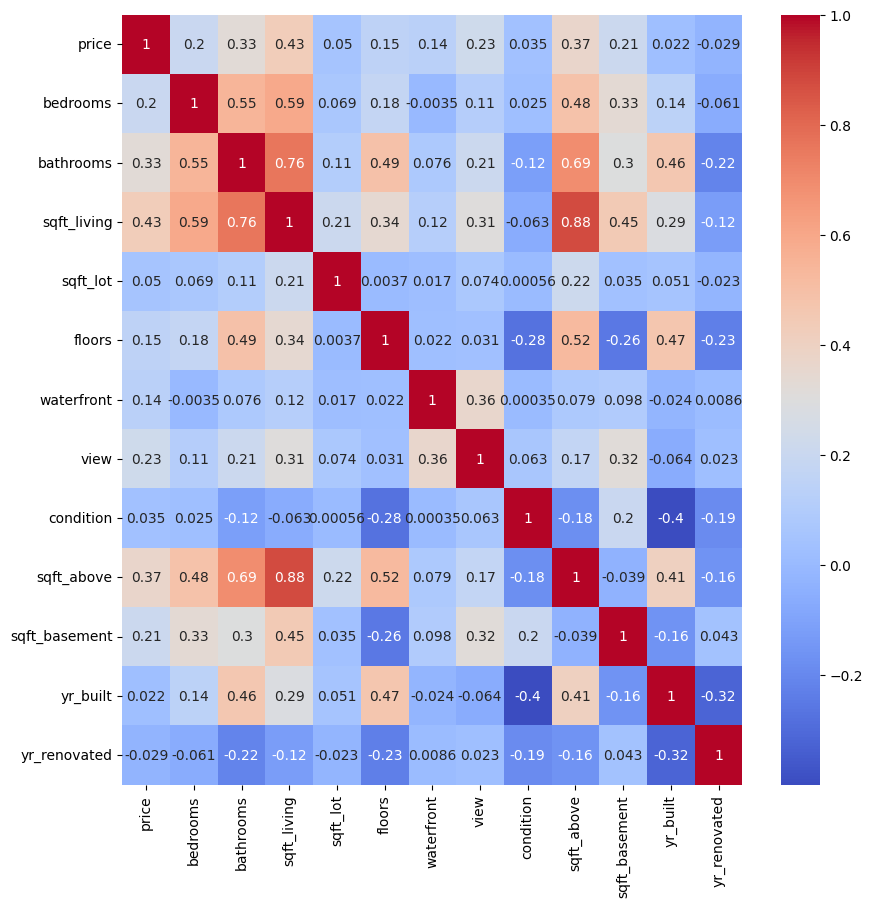

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Remove Outliers

In [ ]:
from scipy.stats import stats
df_numeric = df.select_dtypes(include=[np.number])
z_score = stats.zscore(df_numeric)
print("before outlier size:",df.shape)
#remove outliner
th = 3
df = df[(abs(z_score) <= th).all(axis=1)]
print("after outlier size:",df.shape)
#

before outlier size: (4600, 18)
after outlier size: (4238, 18)


/tmp/ipython-input-2577361563.py:3: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_score = stats.zscore(df_numeric)


# Apply StandardScaler

In [ ]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 00:00:00,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Split input and output

In [ ]:
x = df.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis=1)
y = df['price']

In [ ]:
y

,price
0,313000.000000
2,342000.000000
3,420000.000000
4,550000.000000
5,490000.000000
...,...
4595,308166.666667
4596,534333.333333
4597,416904.166667
4598,203400.000000


In [ ]:
x.shape

(4238, 17)

In [ ]:
y.shape

(4238,)

# Split data training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(3390, 17)

In [ ]:
x_test.shape

(848, 17)

In [ ]:
y_train.shape

(3390,)

In [ ]:
y_test.shape

(848,)

# Build Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

print("Mean Absolute Error (MAE): ",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):",mean_squared_error(y_test, y_pred))
print("R-squared (R2 Score): ",r2_score(y_test, y_pred))

Mean Absolute Error (MAE):  133776.76815396603
Mean Squared Error (MSE): 36173529370.58655
R-squared (R2 Score):  0.450371637872647


# Visulaizing Actual vs Predicted

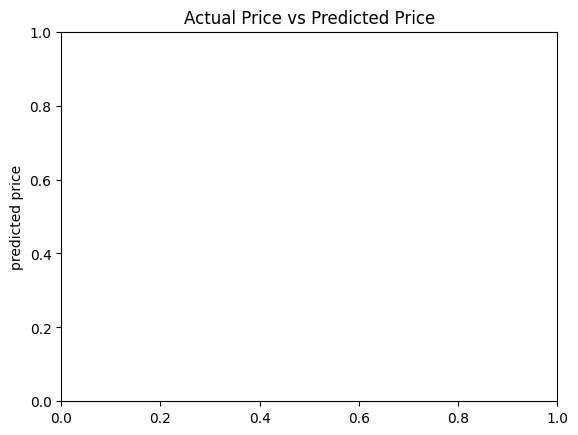

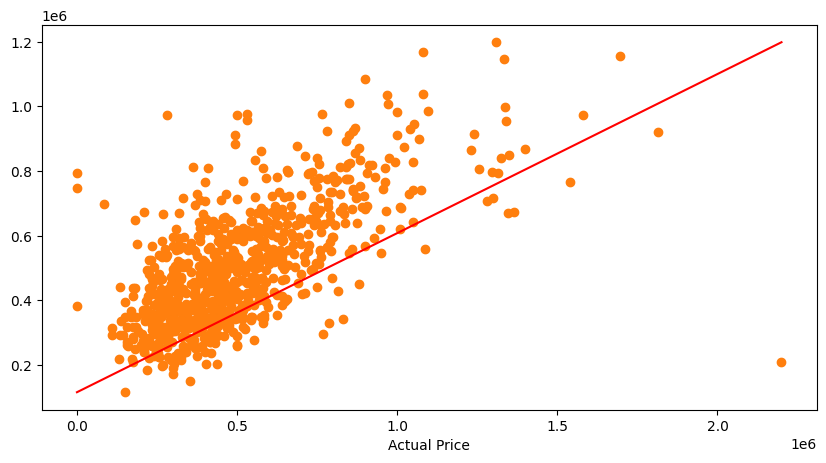

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test,y=y_pred,alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("predicted price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Logical regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("Accuracy Score:", accuracy_score(y_test, y_pred_logistic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

NameError: name 'y_test' is not defined

In [ ]:
df = pd.DataFrame(
    {'sugar_level':[100,80,120,150,200],
     'diseses':[0,0,1,1,1]
     }
)#0 - no disease 1- diseses

In [ ]:
df

,sugar_level,diseses
0,100,0
1,80,0
2,120,1
3,150,1
4,200,1


In [ ]:
x = df[['sugar_level']]
y = df['diseses']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.6,random_state=42, stratify=y)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred_logistic = model.predict(x_test)

In [ ]:
sug_level = int(input("enter your suger level "))
name = input("enter your name ")
pre = model.predict([[sug_level]])
if pre:
  print(f"{name} you have disease")
else:
  print(f"{name} you don't have disease")

enter your suger level 450
enter your name Nakul
Nakul you have disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.DataFrame(
    {'customer_id':[1,2,3,4,5],
     'age':[25,30,35,40,45],
     'salary':[50000,60000,70000,80000,90000],
     'credit_score':[700,650,720,680,600],
     'loan_approval':['No','Yes','No','No','Yes']
     }
)

In [ ]:
df

,customer_id,age,salary,credit_score,loan_approval
0,1,25,50000,700,No
1,2,30,60000,650,Yes
2,3,35,70000,720,No
3,4,40,80000,680,No
4,5,45,90000,600,Yes


# Label Encoding

In [ ]:
le = LabelEncoder()
df['loan_approval'] = le.fit_transform(df['loan_approval'])
df

,customer_id,age,salary,credit_score,loan_approval
0,1,25,50000,700,0
1,2,30,60000,650,1
2,3,35,70000,720,0
3,4,40,80000,680,0
4,5,45,90000,600,1


In [ ]:
x = df[['salary','credit_score']]
y = df['loan_approval']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pre = model.predict(x_test)

# predict loan

In [ ]:
salary = int(input("enter your salary "))
credit_score = int(input("enter your credit score "))
pre = model.predict([[salary,credit_score]])
if pre:
  print("loan approved")
else:
  print("loan not approved")

enter your salary 500000
enter your credit score 60
loan approved


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
